In [1]:
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
from collections import namedtuple
ShotPath = namedtuple('ShotPath', ['vx0', 'vy0', 'xs', 'ys', 'is_hit'])

In [47]:
# filename = 'example.txt'
filename = 'input.txt'

In [48]:
with open(filename) as f:
    intxt = f.readline().rstrip()

_, xtxt, ytxt = intxt.split('=')
xtxt = xtxt.split(',')[0]

In [49]:
tx, ty = [[int(v) for v in txt.split('..')] for txt in (xtxt, ytxt)]
tx, ty

([57, 116], [-198, -148])

In [50]:
def draw_scene(tx, ty, shots):
    fig, ax = plt.subplots()
    draw_target(ax, tx, ty)
    for shot in shots:
        draw_shot(ax, shot)
    plt.show()

def draw_target(ax, tx, ty):
    ax.add_patch(Rectangle((tx[0], ty[0]), tx[1]-tx[0], ty[1]-ty[0],
                 edgecolor='black', facecolor='lightgrey'))
    
def draw_shot(ax, shot):
    ax.plot(shot.xs, shot.ys, ':')
    ax.scatter(shot.xs[-1], shot.ys[-1], marker='x' if shot.is_hit else '+')

In [51]:
def step(px, py, vx, vy):
    px += vx
    py += vy
    vx = max(vx - 1, 0)
    vy -= 1
    return px, py, vx, vy

def check_hit(tx, ty, px, py):
    return tx[0] <= px <= tx[1] and ty[0] <= py <= ty[1]

def run_shot(vx0, vy0):
    vx, vy = vx0, vy0
    px, py = 0, 0
    is_hit = False
    xs = [px]
    ys = [py]
    while not is_hit and px < tx[1] and py > ty[0]:
        px, py, vx, vy = step(px, py, vx, vy)
        xs.append(px)
        ys.append(py)
        is_hit = check_hit(tx, ty, px, py)
    return ShotPath(vx0, vy0, xs, ys, is_hit)

In [52]:
def vx0_for_max_x(max_x):
    # xmax = sum(vx for vx in range(1, vx0+1))
    # xmax = (vx0 * (vx0 + 1)) // 2
    # vx0(xmax) => solve using quadratic formula
    return (-1 + sqrt(1 + 8*max_x)) / 2

In [53]:
shot = run_shot(7, 2)
list(zip(shot.xs, shot.ys))

[(0, 0),
 (7, 2),
 (13, 3),
 (18, 3),
 (22, 2),
 (25, 0),
 (27, -3),
 (28, -7),
 (28, -12),
 (28, -18),
 (28, -25),
 (28, -33),
 (28, -42),
 (28, -52),
 (28, -63),
 (28, -75),
 (28, -88),
 (28, -102),
 (28, -117),
 (28, -133),
 (28, -150),
 (28, -168),
 (28, -187),
 (28, -207)]

In [54]:
[vx0_for_max_x(x) for x in tx]

[10.188779163215974, 14.739750654128171]

In [ ]:
# pt1

In [ ]:
# example
# trys = [(6, vy) for vy in range(1, 2000)]
# shots = [run_shot(vx, vy) for vx, vy in trys]

In [55]:
#trys = [(vx, 50) for vx in range(10, 16)]
trys = [(13, vy) for vy in range(96, 2000)]
shots = [run_shot(vx, vy) for vx, vy in trys]

In [56]:
shots = [shot for shot in shots if shot.is_hit]

In [58]:
print([(shot.vx0, shot.vy0) for shot in shots])

[(13, 96), (13, 97), (13, 147), (13, 148), (13, 149), (13, 150), (13, 151), (13, 152), (13, 153), (13, 154), (13, 155), (13, 156), (13, 157), (13, 158), (13, 159), (13, 160), (13, 161), (13, 162), (13, 163), (13, 164), (13, 165), (13, 166), (13, 167), (13, 168), (13, 169), (13, 170), (13, 171), (13, 172), (13, 173), (13, 174), (13, 175), (13, 176), (13, 177), (13, 178), (13, 179), (13, 180), (13, 181), (13, 182), (13, 183), (13, 184), (13, 185), (13, 186), (13, 187), (13, 188), (13, 189), (13, 190), (13, 191), (13, 192), (13, 193), (13, 194), (13, 195), (13, 196), (13, 197)]


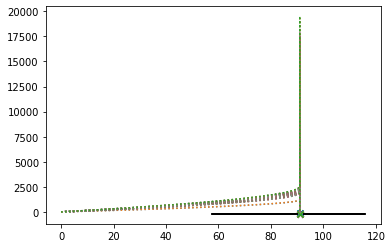

In [16]:
draw_scene(tx, ty, shots)

In [17]:
max(shots[-1].ys)

19503

In [ ]:
# pt2 example

In [42]:
trys = [(vx, vy) for vx in range(100) for vy in range(-10, 100)]
#trys = [(6, vy) for vy in range(1, 2000)]
shots = [run_shot(vx, vy) for vx, vy in trys]

In [43]:
shots = [shot for shot in shots if shot.is_hit]

In [44]:
print([(shot.vy0, shot.vx0) for shot in shots])

[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6), (-1, 7), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (-2, 8), (-1, 8), (0, 8), (1, 8), (-2, 9), (-1, 9), (0, 9), (-2, 10), (-1, 10), (-4, 11), (-3, 11), (-2, 11), (-1, 11), (-4, 12), (-3, 12), (-2, 12), (-4, 13), (-3, 13), (-2, 13), (-4, 14), (-3, 14), (-2, 14), (-4, 15), (-3, 15), (-2, 15), (-10, 20), (-9, 20), (-8, 20), (-7, 20), (-6, 20), (-5, 20), (-10, 21), (-9, 21), (-8, 21), (-7, 21), (-6, 21), (-5, 21), (-10, 22), (-9, 22), (-8, 22), (-7, 22), (-6, 22), (-5, 22), (-10, 23), (-9, 23), (-8, 23), (-7, 23), (-6, 23), (-5, 23), (-10, 24), (-9, 24), (-8, 24), (-7, 24), (-6, 24), (-5, 24), (-10, 25), (-9, 25), (-8, 25), (-7, 25), (-6, 25), (-5, 25), (-10, 26), (-9, 26), (-8, 26), (-7, 26), (-6, 26), (-5, 26), (-10, 27), (-9, 27), (-8, 27), (-7, 27), (-6, 27), (-5, 27), (-10, 28), (-9, 28), (-8, 28), (-7, 28), (-6, 28), (-5, 28), (-10, 29), (-9, 29), (-8, 29), (-7, 29), 

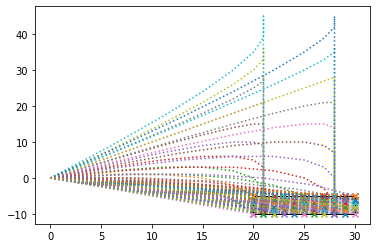

In [45]:
draw_scene(tx, ty, shots)

In [46]:
len(shots)

112

In [ ]:
# pt2 example

In [59]:
trys = [(vx, vy) for vx in range(200) for vy in range(-200, 200)]
#trys = [(6, vy) for vy in range(1, 2000)]
shots = [run_shot(vx, vy) for vx, vy in trys]

In [60]:
shots = [shot for shot in shots if shot.is_hit]

In [64]:
#print([(shot.vy0, shot.vx0) for shot in shots])

In [65]:
#draw_scene(tx, ty, shots)

In [66]:
len(shots)

5200